In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
b_df = pd.read_csv("../Data/Clean_data/beer_clean.csv")
b_df.head(3)

,beer_beerid,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,0.0
1,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,1.0
2,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,0.0


In [3]:
br_df = pd.read_csv("../Data/Clean_data/beer_reviews_clean.csv").drop(columns = ["Unnamed: 0"])
br_df.head()

,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_name,review_count
0,Närke Kulturbryggeri AB,Old Ale,10902.0,4.0,4.5,4.00,4.000000,4.5,8.2,57645,! (Old Ale),1.0
1,The Covey Restaurant & Brewery,Belgian Dark Ale,13338.0,4.0,4.0,4.00,4.000000,4.4,10.0,49236,"""100""",5.0
2,Aviator Brewing Company,American IPA,18635.0,4.0,4.0,3.50,4.000000,4.0,6.6,50696,"""100"" Pale Ale",1.0
3,Flossmoor Station Restaurant & Brewery,Belgian Strong Pale Ale,612.0,4.0,3.5,4.25,4.750000,4.5,9.0,44353,"""12"" Belgian Golden Strong Ale",2.0
4,Baltika-Baku,Dortmunder / Export Lager,13640.0,3.0,3.0,3.00,3.166667,3.0,4.8,30080,"""33"" Export",3.0


In [4]:
# Merge the dataframes
left = b_df
right = br_df

merged_df = pd.merge(left, right, on = "beer_beerid")

merged_df.head()

,beer_beerid,name,brewery_id_x,state,country,style,availability,abv,notes,retired,...,beer_style,brewery_id_y,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_name,review_count
0,15271,Belgian Style Wit,1345,WA,US,Belgian Witbier,Year-round,4.5,No notes at this time.,1.0,...,Witbier,1345.0,2.000000,3.000000,3.000000,4.000000,2.000000,4.5,Belgian Style Wit,1.0
1,55,Redhook Double Black Stout,18134,NH,US,American Imperial Stout,Rotating,7.0,Brewed with coffee.,0.0,...,American Double / Imperial Stout,18134.0,3.877163,3.756055,4.017301,3.716263,3.865052,7.0,Redhook Double Black Stout (with Coffee),289.0
2,71854,Three Flowers,812,CA,US,Rye Beer,Rotating,6.5,No notes at this time.,0.0,...,American IPA,812.0,3.250000,2.750000,3.500000,2.750000,2.750000,6.5,Three Flowers,2.0
3,66299,Chief Lightfoot,22434,WA,US,Irish Red Ale,Rotating,5.5,No notes at this time.,0.0,...,Irish Red Ale,22434.0,4.000000,3.500000,4.000000,3.500000,4.000000,5.5,Chief Lightfoot,1.0
4,68590,Red Carpet Ale,25430,CA,US,American Amber / Red Ale,Year-round,5.9,No notes at this time.,1.0,...,American Amber / Red Ale,25430.0,2.500000,3.166667,3.666667,3.166667,2.666667,5.9,Red Carpet Ale,3.0


In [5]:
merged_df.columns.tolist()

['beer_beerid',
 'name',
 'brewery_id_x',
 'state',
 'country',
 'style',
 'availability',
 'abv',
 'notes',
 'retired',
 'brewery_name',
 'beer_style',
 'brewery_id_y',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste',
 'beer_abv',
 'beer_name',
 'review_count']

In [6]:
# name = beer_name
# style = beer_style
# notes are irrelevant
# brewery_id_x = brewery_id_y
merged_df = merged_df.drop(columns = ["name", "style", "notes", "brewery_id_y"])

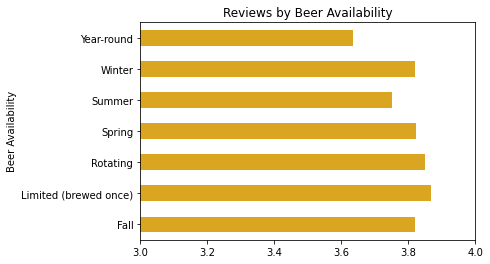

In [10]:
# Correlation between beer availablility and Average Review?
X = merged_df.groupby("availability")["review_overall"].mean()
X.plot(kind = "barh", title = "Reviews by Beer Availability", ylabel = "Average Overall Review", xlabel = "Beer Availability", color = "goldenrod")
plt.xlim([3.0,4.0])
plt.show()

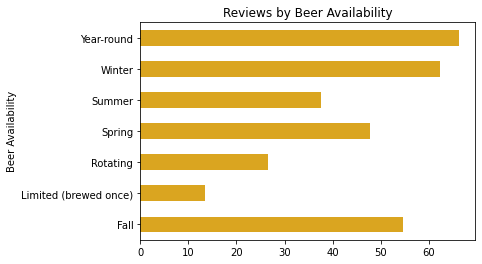

In [19]:
# Correlation between beer availablility and popularity(review count)?
X = merged_df.groupby("availability")["review_count"].mean()
X.plot(kind = "barh", title = "Reviews by Beer Availability", ylabel = "Avg. # of Reviews", xlabel = "Beer Availability", color = "goldenrod")
# plt.xlim([3.0,4.0])
plt.show()